# NYC Demography Analysis

How is the population of New York City, distribuited accross the five boroughs?

The five boroughs from NYC are:
   * The Bronx
   * Brooklyn
   * Manhattan
   * Queens
   * Staten Island
   
The data is available from:<br>
https://en.wikipedia.org/wiki/New_York_City<br>
https://en.wikipedia.org/wiki/The_Bronx<br>
https://en.wikipedia.org/wiki/Brooklyn<br>
https://en.wikipedia.org/wiki/Manhattan<br>
https://en.wikipedia.org/wiki/Queens<br>
https://en.wikipedia.org/wiki/Staten_Island<br>

Where the new york city information, is the sum of the remining 5 regions. This analysis comprehense the span from 1900 to 2000 and pretends to show, how the population from NYC is distribuited across the 5 regions.

In [51]:
#Libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

#Reading Data from URL
NYCPop = pd.read_html(io = 'https://en.wikipedia.org/wiki/New_York_City',
                      match = 'Historical population',
                      header = 1,
                      index_col = 0)[0]

BronxPop = pd.read_html(io = 'https://en.wikipedia.org/wiki/The_Bronx',
                      match = 'Historical population',
                      header = 1,
                      index_col = 0)[0]

BrooklynPop = pd.read_html(io = 'https://en.wikipedia.org/wiki/Brooklyn',
                      match = 'Historical population',
                      header = 1,
                      index_col = 0)[0]

ManhattanPop = pd.read_html(io = 'https://en.wikipedia.org/wiki/Manhattan',
                      match = 'Historical population',
                      header = 1,
                      index_col = 0)[0]

QueensPop = pd.read_html(io = 'https://en.wikipedia.org/wiki/Queens',
                      match = 'Historical population',
                      header = 1,
                      index_col = 0)[0]

StatenIslandPop = pd.read_html(io = 'https://en.wikipedia.org/wiki/Staten_Island',
                      match = 'Historical population',
                      header = 1,
                      index_col = 0)[0]

names = ['NYC', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'State Island']

In [52]:
##Cleaning Data
allDataFrames = [NYCPop.copy(), 
                 BronxPop.copy(),
                 BrooklynPop.copy(),
                 ManhattanPop.copy(),
                 QueensPop.copy(),
                 StatenIslandPop.copy()]
n = 6

#Changing Columns Names
for i in range(n):
    #Drop columns named: "Unnamed: 2"
    try:
        allDataFrames[i].drop('Unnamed: 2', axis=1, inplace=True)
    except:
        pass
    
    #Rename columns
    allDataFrames[i].columns = ['Population' , '%']

    #Drop last row which is just information
    allDataFrames[i].drop(allDataFrames[i].index[-1], inplace=True)
    
    #Drop second last row from everything but NYC as the table strcture is slightly different
    if (i > 0):
        allDataFrames[i].drop(allDataFrames[i].index[-1], inplace=True)

    #Changing Index values to PeriodTimeIndex
    allDataFrames[i].index = pd.to_datetime(allDataFrames[i].index, errors = 'coerce').to_period("Y")

    #removing data before 1900 and after 2000
    allDataFrames[i] = allDataFrames[i]['1900':'2000']
    
    #Rename Index name
    allDataFrames[i].index.name = 'Year'
    
    #Set the Region Column    
    allDataFrames[i]['Region'] = names[i]
    
    allDataFrames[i].drop('%', axis=1, inplace=True)

In [53]:
#Concatenate all dataframes vertically
allData = pd.concat(allDataFrames)

#Reset index
allData.reset_index(inplace=True)

#Set the new index to be year, region
allData.set_index(['Year'],inplace=True)

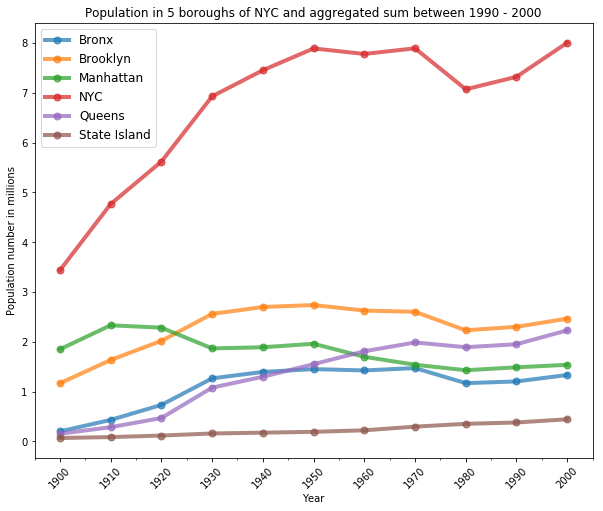

In [54]:
#plotting Data
fig, ax = plt.subplots(figsize=(10,8))
legend = []
for label, df in allData.groupby('Region'):
    legend.append(label)
    df.plot(kind='line', ax = ax, marker='o', linewidth=4, alpha=0.7, markersize=7)
ax.legend(legend, loc = 2, prop={'size': 12})


#set xticks
xticks = df.index.strftime('%Y').values
ylabels = list(map(lambda x: str(int(x)), np.linspace(0, 8, 9)))
plt.xticks(xticks, xticks, rotation=45);
plt.yticks(np.linspace(0, 8000000, 9), ylabels)
plt.title('Population in 5 boroughs of NYC and aggregated sum between 1990 - 2000');
plt.ylabel('Population number in millions');